In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,Password,Times
0,631XniVx2lS5I,2
1,LEGIT747,1
2,742364es,1
3,3846696477,1
4,laurahop,2


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151496 entries, 0 to 4151495
Data columns (total 2 columns):
Password    object
Times       int64
dtypes: int64(1), object(1)
memory usage: 63.3+ MB


In [7]:
def get_year(times):
    if not times:
        return 0
    str_val = str(times)
    if not ((len(str_val) == 6 or len(str_val) == 8) and str_val.isdigit()):
        return 0
    first = int(str_val[0:2])
    second = int(str_val[2:4])
    if not (first > 0 and second > 0 and (first < 32 and second < 13 or first < 13 and second < 32)):
        return 0
    year_str = str_val[4:]
    if len(year_str) == 4:
        year = int(year_str)
        if year >= 1900 and year <= 2019:
            return year
        else:
            return 0
    year = int(year_str)
    if year <= 19:
        return 2000 + year
    return 1900 + year

In [8]:
train['Year'] = train['Password'].map(get_year)

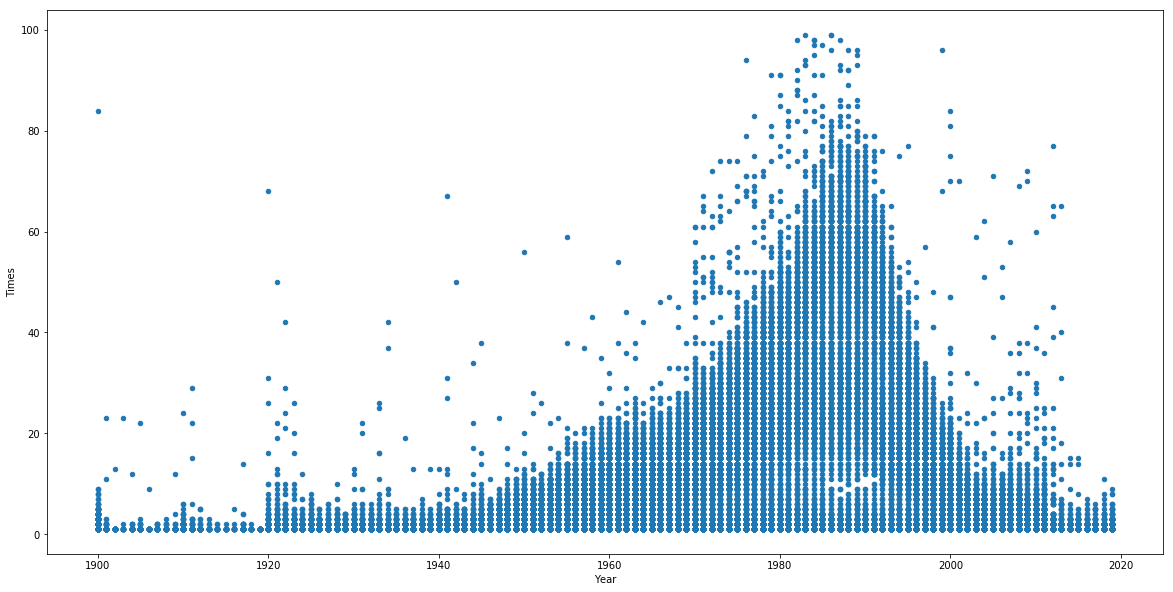

In [18]:
train[(train['Year'] > 0) & (train['Times'] < 100)].plot.scatter(x='Year', y='Times', figsize=(20,10))

In [19]:
most_common_year = 1987

In [20]:
train['DiffYear'] = train['Year'].map(lambda x: np.abs(x - most_common_year))

In [21]:
train['LogDiffYear'] = train['DiffYear'].map(lambda x: np.log(1+x))

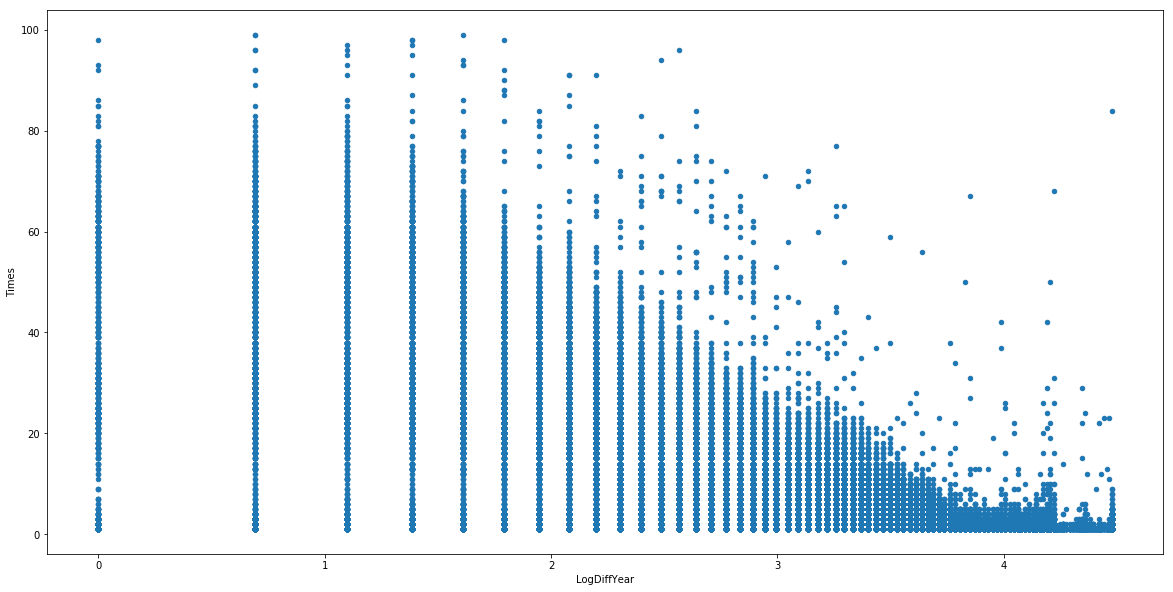

In [30]:
train[(train['Year'] > 0) & (train['Times'] < 100)].plot.scatter(x='LogDiffYear', y='Times', figsize=(20,10))

In [31]:
train_values = train[(train['Year'] > 0) & (train['Times'] < 100)][['LogDiffYear', 'Times']].values

[-10.19658836  40.83532117]


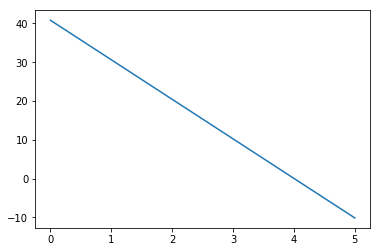

In [42]:
z = np.polyfit(train_values[:,0], train_values[:,1], 1)
print(z)
p = np.poly1d(z)
xp = np.linspace(0, 5, 100)
plt.plot(xp, p(xp))
plt.show()

In [35]:
test = pd.read_csv('Xtest.csv')

In [36]:
test.head()

,Id,Password
0,0,ThaisCunha
1,1,697775113
2,2,922a16922a
3,3,andy74
4,4,joemack


In [37]:
test['Year'] = test['Password'].map(get_year)
test['DiffYear'] = test['Year'].map(lambda x: np.abs(x - most_common_year))
test['LogDiffYear'] = test['DiffYear'].map(lambda x: np.log(1+x))

In [38]:
with open('output.csv', 'w+') as f:
    f.write('Id,Times\n')
    for index, row in test.iterrows():
        count = 1
        
        if row['Year'] > 0:
            count = np.amax([1,p(row['LogDiffYear'])])
        
        f.write('{},{}\n'.format(row['Id'], count))